Found 393 files belonging to 5 classes.
Found 98 files belonging to 5 classes.
Epoch 1/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 487ms/step - accuracy: 0.3209 - loss: 1.5859 - val_accuracy: 0.6020 - val_loss: 1.3911
Epoch 2/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.7611 - loss: 0.8000 - val_accuracy: 0.6429 - val_loss: 1.0624
Epoch 3/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 408ms/step - accuracy: 0.8081 - loss: 0.5541 - val_accuracy: 0.5816 - val_loss: 1.2415
Epoch 4/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.8831 - loss: 0.3340 - val_accuracy: 0.5408 - val_loss: 1.2982
Epoch 5/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 422ms/step - accuracy: 0.9367 - loss: 0.2549 - val_accuracy: 0.6020 - val_loss: 1.2573
Epoch 6/6
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - accuracy: 0.9686 - loss: 0.1707 - val_accuracy: 0.6633 - val_loss: 1.1211
Train accuracy: 94.91%
Test accuracy: 66.33%


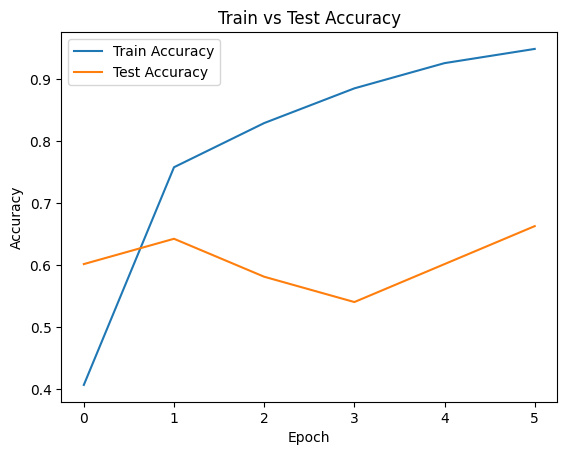

In [9]:
# Clasificación de 5 clases con Transfer Learning y MobileNet

import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import image_dataset_from_directory

# Cargar el modelo base MobileNet sin la parte superior
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)
preds = Dense(5, activation='softmax')(x)  # 5 clases

model = Model(inputs=base_model.input, outputs=preds)

# Congelar capas base y dejar entrenables las últimas
for layer in model.layers[:-5]:
    layer.trainable = False
for layer in model.layers[-5:]:
    layer.trainable = True

# Cargar el dataset de entrenamiento
train_dataset = image_dataset_from_directory(
    'train/',
    image_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    label_mode='categorical',
    shuffle=True
)

# Cargar el dataset de prueba
test_dataset = image_dataset_from_directory(
    'test/',
    image_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    label_mode='categorical',
    shuffle=False
)

# Compilar el modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(train_dataset, epochs=6, validation_data=test_dataset)

# Mostrar Accuracy de train y test
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Train accuracy: {train_acc * 100:.2f}%")
print(f"Test accuracy: {val_acc * 100:.2f}%")

# (Opcional) Gráfica del accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Test Accuracy')
plt.show()
